In [1]:
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("high_diamond_ranked_10min.csv")
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
print(data.shape)

(9869, 40)


In [4]:
Victory=data['blueWins'] #Victory=label
gameId=data['gameId']
data.drop(['gameId'],1,inplace=True)
data.drop(['blueWins'],1,inplace=True)

In [5]:
print(data.shape)

(9869, 38)


In [6]:
print(Victory.shape)
print(Victory)

(9869,)
0       0
1       0
2       0
3       0
4       0
       ..
9864    1
9865    1
9866    1
9867    0
9868    1
Name: blueWins, Length: 9869, dtype: int64


In [7]:
mean=data.mean(axis=0)
std=data.std(axis=0)
N_data=(data-mean)/std

N_data.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0.316936,-0.379869,0.990570,0.935202,-0.047069,1.071313,-0.879164,-0.752959,-0.481249,-0.21054,...,-0.198447,0.052025,-0.410222,-0.762946,-0.928699,0.367695,-0.256290,-0.013552,-0.928699,0.052025
1,-0.570836,-0.839577,-1.009417,-0.393071,-0.387882,-0.404681,-0.879164,-0.752959,-0.481249,-0.21054,...,4.409731,0.758201,-0.410222,-0.436787,1.033938,0.068496,1.190760,0.592974,1.033938,0.758201
2,-0.404379,-1.299286,-1.009417,0.271065,1.656993,-0.650680,0.719596,1.327958,-0.481249,-0.21054,...,-0.198447,0.533539,-0.410222,-0.590273,-0.654843,-2.325095,0.483331,0.520086,-0.654843,0.533539
3,1.149224,-0.839577,-1.009417,-0.725140,-0.387882,-0.404681,0.719596,-0.752959,2.077718,-0.21054,...,-0.198447,-0.007661,0.244766,-0.000518,0.805724,-0.430169,0.544050,-0.014073,0.805724,-0.007661
4,2.924769,0.539548,-1.009417,-0.061003,-0.047069,-0.158682,-0.879164,-0.752959,-0.481249,-0.21054,...,-0.198447,0.613345,0.244766,0.293109,0.349297,1.564491,0.414871,-0.137461,0.349297,0.613345


In [8]:
model = Sequential()
model.add(Dense(8, input_shape=(38,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(N_data, Victory, batch_size=100, epochs=15, validation_split=0.2, callbacks=[early_stop])

Train on 7895 samples, validate on 1974 samples
Epoch 1/15
7895/7895 [==============================] - 1s 121us/sample - loss: 0.5905 - accuracy: 0.6688 - val_loss: 0.5554 - val_accuracy: 0.7188
Epoch 2/15
7895/7895 [==============================] - 0s 31us/sample - loss: 0.5402 - accuracy: 0.7229 - val_loss: 0.5455 - val_accuracy: 0.7214
Epoch 3/15
7895/7895 [==============================] - 0s 30us/sample - loss: 0.5333 - accuracy: 0.7281 - val_loss: 0.5432 - val_accuracy: 0.7244
Epoch 4/15
7895/7895 [==============================] - 0s 30us/sample - loss: 0.5302 - accuracy: 0.7321 - val_loss: 0.5420 - val_accuracy: 0.7264
Epoch 5/15
7895/7895 [==============================] - 0s 31us/sample - loss: 0.5281 - accuracy: 0.7327 - val_loss: 0.5426 - val_accuracy: 0.7295
Epoch 6/15
7895/7895 [==============================] - 0s 30us/sample - loss: 0.5266 - accuracy: 0.7348 - val_loss: 0.5416 - val_accuracy: 0.7290
Epoch 7/15
7895/7895 [==============================] - 0s 30us/sampl

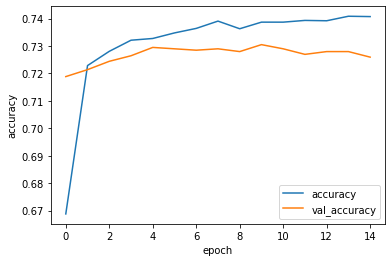

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [19]:
test_data=pd.read_csv("Test_data.csv")
print(test_data.shape)
test_data.head()

(10, 40)


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4527875317,0,12,1,0,9,12,12,1,1,...,0,18319,7.4,19287,187,68,2121,1038,18.7,1831.9
1,4527811425,1,46,2,1,5,3,2,0,0,...,0,14949,6.8,18046,202,64,-1974,-1712,20.2,1494.9
2,4527715781,0,12,2,0,4,5,5,2,1,...,0,15858,6.8,17873,248,48,727,-343,24.8,1585.8
3,4527650398,1,12,0,1,7,7,9,0,0,...,0,16399,7.0,18001,216,58,-756,-1,21.6,1639.9
4,4527878058,1,18,2,1,12,6,13,0,0,...,0,15934,6.6,17027,197,38,-2639,-2364,19.7,1593.4


In [20]:
t_Victory=test_data['blueWins'] #Victory=label
t_gameId=test_data['gameId']
test_data.drop(['gameId'],1,inplace=True)
test_data.drop(['blueWins'],1,inplace=True)
print(test_data.shape)

(10, 38)


In [21]:
N_test_data=(test_data-mean)/std

In [22]:
N_test_data.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,-0.570836,-0.839577,-1.009417,0.935202,1.997806,1.317312,0.719596,1.327958,-0.481249,-0.21054,...,-0.198447,1.226974,1.554743,1.105587,-1.385127,1.664224,0.870054,0.522690,-1.385127,1.226974
1,1.315681,-0.379869,0.990570,-0.393071,-1.069507,-1.142678,-0.879164,-0.752959,-0.481249,-0.21054,...,-0.198447,-1.033058,-0.410222,0.070386,-0.700486,1.265292,-0.798679,-0.909025,-0.700486,-1.033058
2,-0.570836,-0.379869,-1.009417,-0.725140,-0.387882,-0.404681,2.318355,1.327958,2.077718,-0.21054,...,-0.198447,-0.423453,-0.410222,-0.073924,1.399080,-0.330436,0.301992,-0.196291,1.399080,-0.423453
3,-0.570836,-1.299286,0.990570,0.271065,0.293743,0.579315,-0.879164,-0.752959,-0.481249,-0.21054,...,-0.198447,-0.060641,0.244766,0.032849,-0.061488,0.666894,-0.302338,-0.018238,-0.061488,-0.060641
4,-0.237922,-0.379869,0.990570,1.931407,-0.047069,1.563311,-0.879164,-0.752959,-0.481249,-0.21054,...,-0.198447,-0.372485,-1.065211,-0.779629,-0.928699,-1.327766,-1.069670,-1.248471,-0.928699,-0.372485


In [23]:
test_loss, test_acc = model.evaluate(N_test_data, t_Victory)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc))

10/10 [==============================] - 0s 1ms/sample - loss: 0.4456 - accuracy: 0.7000
loss: 0.446
acc: 0.700


In [24]:
print(N_test_data.shape)

(10, 38)


In [25]:
predicted_t=model.predict(N_test_data)
print(t_Victory)
print(predicted_t)

0    0
1    1
2    0
3    1
4    1
5    1
6    1
7    0
8    0
9    1
Name: blueWins, dtype: int64
[[0.45260343]
 [0.794397  ]
 [0.548463  ]
 [0.48473462]
 [0.84078604]
 [0.8747223 ]
 [0.75242573]
 [0.19416772]
 [0.43475458]
 [0.48367083]]


In [26]:
for i in range(10):
    print(i+1)
    if(predicted_t[i][0]>=0.5 and t_Victory[i]==1):
        print(f"label: 1(Blueteam Win) | predict: 1(Blueteam Win)")
    elif(predicted_t[i][0]<0.5 and t_Victory[i]==1):
        print(f"label: 1(Blueteam Win) | predict: 0(Redteam Win)")
    elif(predicted_t[i][0]>=0.5 and t_Victory[i]==0):
        print(f"label: 0(Redteam Win) | predict: 1(Blueteam Win)")
    elif(predicted_t[i][0]<0.5 and t_Victory[i]==0):
        print(f"label: 0(Redteam Win) | predict: 0(Redteam Win)")
    print("")

1
label: 0(Redteam Win) | predict: 0(Redteam Win)

2
label: 1(Blueteam Win) | predict: 1(Blueteam Win)

3
label: 0(Redteam Win) | predict: 1(Blueteam Win)

4
label: 1(Blueteam Win) | predict: 0(Redteam Win)

5
label: 1(Blueteam Win) | predict: 1(Blueteam Win)

6
label: 1(Blueteam Win) | predict: 1(Blueteam Win)

7
label: 1(Blueteam Win) | predict: 1(Blueteam Win)

8
label: 0(Redteam Win) | predict: 0(Redteam Win)

9
label: 0(Redteam Win) | predict: 0(Redteam Win)

10
label: 1(Blueteam Win) | predict: 0(Redteam Win)

